<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/%E5%8D%97%E4%BA%9EPA%E5%BB%A0%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90_R6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import gc
drive.mount('/content/drive')
gc.collect()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


0

# Load data

In [2]:
import pandas as pd
from  tqdm import tqdm_notebook as tqdm

# load
path = '/content/drive/My Drive/南亞PA廠/PA_201605-201909R6.xlsx'
df = pd.read_excel(path,index_col=0,parse_dates = True)

# columns to_numeric
for col in tqdm(df.columns):
  df[col] = pd.to_numeric(df[col],errors='coerce')

# add target
df['target'] = df['MLPAP_FQI-0997.PV'] / df['MLPAP_FQ-0619.PV']

gc.collect()
# show
print(df.shape)
df.tail()


(58081, 72)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,MLPAP_TI-0706B12,MLPAP_TI-0706B13,MLPAP_TI-0706B14,MLPAP_TI-0706B15,MLPAP_TI-0706B16,MLPAP_TI-0706B17,MLPAP_TI-0706B18,MLPAP_TI-0706B19,MLPAP_TI-0706B20,MLPAP_TI-0706B21,MLPAP_TI-0706B22,MLPAP_TI-0706B23,MLPAP_TI-0706B24,MLPAP_TJR-0715A1.PV,MLPAP_TJR-0715A2.PV,MLPAP_TJR-0715B1.PV,MLPAP_TJR-0715B2.PV,MLPAP_TJR-0720A1.PV,MLPAP_TJR-0720A2.PV,MLPAP_TJR-0720B1.PV,MLPAP_TJR-0720B2.PV,MLPAP_TJR-0762A1.PV,MLPAP_TJR-0762A2.PV,MLPAP_TJR-0762B1.PV,MLPAP_TJR-0762B2.PV,MLPAP_TI-0706A02,MLPAP_TI-0706B01,MLPAP_TI-0706C01,MLPAP_TI-0706D01,MLPAP_TI-0716B01,MLPAP_TI-0716C01,MLPAP_TI-0716D01,MLPAP_TI-0716E01,MLPAP_TI-0716A01,MLPAP_TI-0706E01,MLPAP_TI-0706A01,MLPAP_TI-0716D02,MLPAP_TJC-0627.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_FQ-0619.PV,MLPAP_TIC-0757A.PV,MLPAP_TI-0757B.PV,MLPAP_PIC-0741.PV,MLPAP_LIC-0738.PV,MLPAP_PIC-0761.PV,MLPAP_TRC-0762.PV,MLPAP_LRC-0729.PV,MLPAP_TIC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_TJR-0721.PV,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
2019-08-31 22:00:00,88.0,88.0,87.0,88.0,87.0,87.0,87.0,87.0,86.000000,86.0,86.0,86.0,86.0,86.000000,85.0,85.0,84.0,85.0,84.0,82.0,83.0,84.0,83.0,88.251274,82.400002,87.500824,81.800003,0.0,81.048729,83.500000,95.000000,0.0,92.500000,88.900002,87.900002,88.0,81.0,88.0,82.0,93.0,81.0,89.0,106.0,87.0,89.000000,85.0,83.0,29.351271,179.899994,0.0,0.0,50.0,0.0,0.3,86.529999,0.3,92.500000,0.0,61.402542,179.000000,65.900002,0.0,58077,4.53,4.523893,3.084818,128.298767,128.125806,-1.0,-50.0,0.008,NaN
2019-08-31 22:30:00,88.0,88.0,87.0,88.0,87.0,87.0,87.0,87.0,86.991974,86.0,86.0,86.0,86.0,85.008026,85.0,85.0,84.0,85.0,84.0,82.0,83.0,84.0,83.0,88.402390,82.500801,87.500801,81.699997,0.0,81.199997,83.500801,95.297592,0.0,92.548805,88.702408,87.800003,88.0,81.0,88.0,82.0,93.0,81.0,89.0,106.0,87.0,89.000000,85.0,83.0,29.299999,179.899994,0.0,0.0,50.0,0.0,0.3,86.400002,0.3,92.500000,0.0,59.948807,180.800003,66.000000,0.0,58078,4.40,4.394068,1.527576,130.698090,130.521894,-1.0,-50.0,0.008,NaN
2019-08-31 23:00:00,88.0,88.0,87.0,88.0,87.0,87.0,87.0,87.0,86.992149,86.0,86.0,86.0,86.0,85.007851,85.0,85.0,84.0,85.0,84.0,82.0,83.0,84.0,83.0,88.295456,82.500000,87.699211,81.699997,0.0,81.204544,83.500786,95.000786,0.0,92.599998,88.900787,87.800003,88.0,81.0,88.0,82.0,93.0,81.0,89.0,106.0,87.0,88.489616,85.0,83.0,29.248865,179.699997,0.0,0.0,50.0,0.0,0.3,86.490005,0.3,92.599998,0.0,60.590916,180.500000,66.099998,0.0,58079,4.57,4.563839,3.129686,129.700394,129.525543,-1.0,-50.0,0.008,NaN
2019-08-31 23:30:00,88.0,88.0,87.0,88.0,87.0,87.0,87.0,87.0,87.000000,86.0,86.0,86.0,86.0,86.000000,85.0,85.0,84.0,85.0,84.0,82.0,83.0,84.0,83.0,88.248802,82.500000,87.501686,81.800003,0.0,81.199997,83.599998,95.199150,0.0,92.599998,88.999191,87.800003,88.0,81.0,88.0,82.0,93.0,81.0,89.0,106.0,87.0,88.000000,85.0,83.0,29.200001,179.600006,0.0,0.0,50.0,0.0,0.3,86.639999,0.3,92.599998,0.0,60.353588,173.600006,66.099998,0.0,58080,4.48,4.473960,3.697329,129.000000,128.826093,-1.0,-50.0,0.008,NaN
2019-09-01 00:00:00,88.0,88.0,87.0,88.0,87.0,87.0,87.0,87.0,87.000000,86.0,86.0,86.0,86.0,86.000000,85.0,85.0,84.0,85.0,84.0,82.0,83.0,84.0,83.0,88.199997,82.500824,87.699135,81.699997,0.0,81.253754,83.599998,95.100861,0.0,92.651245,88.900002,87.800003,88.0,81.0,88.0,82.0,93.0,81.0,89.0,106.0,87.0,88.511322,85.0,83.0,29.200001,179.800003,0.0,0.0,50.0,0.0,0.3,86.570000,0.3,92.699135,0.0,59.848751,180.500000,66.099998,0.0,58081,4.50,4.493933,2.785345,130.401550,130.225754,-1.0,-50.0,0.008,NaN


# 統計資訊

In [3]:
df['target'].describe()

count    4.701800e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.091051e+00
50%      1.102157e+00
75%      1.112404e+00
max               inf
Name: target, dtype: float64

# Load tag盤點表

In [4]:
tag盤點表 = pd.read_excel('/content/drive/My Drive/南亞PA廠/tag盤點表.xlsx')
中文map = dict(zip(tag盤點表['TAG'],tag盤點表['chinese']))
tag盤點表.head()

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
0,1.0,MLPAP_TJC-0627.PV,OX預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,140,160,***
1,2.0,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,160,200,***
2,3.0,MLPAP_FR-0632.PV,汽機風量,流量,KNM3/HR,可控制因子,1分鐘2筆,30,90,****
3,4.0,MLPAP_FQ-0619.PV,OX入料量,流量,kg/HR,可控制因子,1分鐘2筆,2000,8000,****
4,5.0,MLPAP_TIC-0757A.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****


# 定義可控制因子

In [5]:
可控制因子 = list(tag盤點表[tag盤點表.category=="可控制因子"]['TAG'].values)
print('可控制因子數量:',len(可控制因子))

可控制因子數量: 13


# 全部欄位 corr

In [6]:
y_name = 'target'
all_corrs = abs(df.corr())[[y_name]].sort_values(by=y_name,ascending=False)
all_corrs['中文'] = all_corrs.index.map(中文map)
all_corrs = all_corrs[['中文',y_name]]
all_corrs.index.name = '全部欄位相關係數'
all_corrs.head(10)

,中文,target
全部欄位相關係數,,
target,NaN,1.000000
MLPAP_FQI-0997.PV,粗PA出料量,0.591380
MLPAP_FQ-0619.PV,OX入料量,0.337525
MLPAP_FR-0791.PV,反應槽50K蒸氣輸出,0.326117
MLPAP_TI-0706B09,反應槽溫度_多點式(高度 950),0.304193
MLPAP_TI-0706B08,反應槽溫度_多點式(高度 850),0.275929
MLPAP_TI-0706B10,反應槽溫度_多點式(高度 1050),0.247835
MLPAP_TI-0706E01,反應槽觸媒溫度(CL1)_高度(1310),0.211496
MLPAP_FR-0632.PV,汽機風量,0.208166


# 可控制因子 corr

In [7]:
y_name = 'target'
可控_corrs = abs(df[可控制因子+[y_name]].corr())[[y_name]].sort_values(by=y_name,ascending=False)
可控_corrs['中文'] = 可控_corrs.index.map(中文map)
可控_corrs = 可控_corrs[['中文',y_name]]
可控_corrs.index.name = '可控因子相關係數'
可控_corrs.head(10)

,中文,target
可控因子相關係數,,
target,NaN,1.000000
MLPAP_FQ-0619.PV,OX入料量,0.337525
MLPAP_FR-0632.PV,汽機風量,0.208166
MLPAP_PIC-0761.PV,鹽浴冷卻器(E112)出口壓力,0.148769
MLPAP_TIC-0757A.PV,反應槽鹽浴溫度,0.115184
MLPAP_TIC-0757.PV,反應器A/B側鹽浴溫度差,0.098067
MLPAP_TRC-0762.PV,鹽浴冷卻器(E112)入口溫度,0.075499
MLPAP_LIC-0738.PV,汽鼓(V211)鍋爐水液位,0.061041
MLPAP_TJC-0627.PV,OX預熱器出口溫度,0.057344


# kdeplot

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings;warnings.simplefilter('ignore')
def kdeplot(df,x_col,y_col,y_ub,y_lb,x_range=None):
  g1 = df.loc[df[y_col] > y_ub ,x_col]
  g2 = df.loc[df[y_col] < y_lb ,x_col]
  sns.kdeplot(g1 ,label = y_col + '>' +str(y_ub))
  sns.kdeplot(g2 ,label = y_col + '<' +str(y_lb))
  #中文
  try:
    print(pd.Series(x_col).map(中文map))
  except:
    pass
  #調整x軸範圍
  if x_range != None:
    plt.xlim(x_range)  
  #秀圖
  plt.legend()   
  plt.xlabel(x_col)
  plt.ylabel('density')
  plt.title(x_col)
  plt.show()

In [0]:
y_ub = 1.12
y_lb = 1.09

# 全部欄位排名前10 KDEPLOT

In [10]:
all_corrs.head(10).index[1:]

Index(['MLPAP_FQI-0997.PV', 'MLPAP_FQ-0619.PV', 'MLPAP_FR-0791.PV',
       'MLPAP_TI-0706B09', 'MLPAP_TI-0706B08', 'MLPAP_TI-0706B10',
       'MLPAP_TI-0706E01', 'MLPAP_FR-0632.PV', 'MLPAP_TI-0706B07'],
      dtype='object', name='全部欄位相關係數')

0    汽鼓(V211)鍋爐水壓力
dtype: object


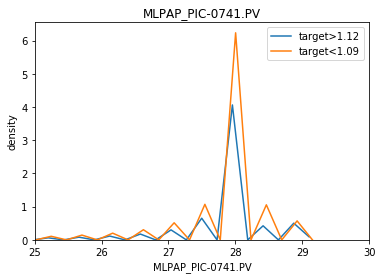

In [11]:
kdeplot(df,'MLPAP_PIC-0741.PV',y_name,y_ub,y_lb,x_range=(25,30))

# 可控制因子 KDEPLOT

In [12]:
可控_corrs.index[1:]

Index(['MLPAP_FQ-0619.PV', 'MLPAP_FR-0632.PV', 'MLPAP_PIC-0761.PV',
       'MLPAP_TIC-0757A.PV', 'MLPAP_TIC-0757.PV', 'MLPAP_TRC-0762.PV',
       'MLPAP_LIC-0738.PV', 'MLPAP_TJC-0627.PV', 'MLPAP_TRC-0610.PV',
       'MLPAP_PIC-0741.PV', 'MLPAP_LRC-0729.PV', 'MLPAP_TRC-1734.PV',
       'MLPAP_TIC-1721.PV'],
      dtype='object', name='可控因子相關係數')

0    鹽浴冷卻器(E112)入口溫度
dtype: object


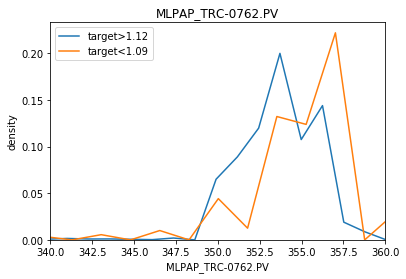

In [13]:
kdeplot(df,'MLPAP_TRC-0762.PV',y_name,y_ub,y_lb,x_range=(340,360))

# correlation matrix

In [14]:
n = 5
t = abs(df[可控制因子+[y_name]].corr())
t = t.sort_values(by='target',ascending=False)
t = t.loc[t.head(n).index,t.head(n).index]
t.style.background_gradient()

,target,MLPAP_FQ-0619.PV,MLPAP_FR-0632.PV,MLPAP_PIC-0761.PV,MLPAP_TIC-0757A.PV
target,1,0.337525,0.208166,0.148769,0.115184
MLPAP_FQ-0619.PV,0.337525,1,0.977658,0.828461,0.834387
MLPAP_FR-0632.PV,0.208166,0.977658,1,0.846401,0.857347
MLPAP_PIC-0761.PV,0.148769,0.828461,0.846401,1,0.959616
MLPAP_TIC-0757A.PV,0.115184,0.834387,0.857347,0.959616,1


# features selected

In [15]:
features = 可控制因子.copy()
for col_name in [y_name,'MLPAP_FQI-0997.PV','MLPAP_FQ-0619.PV']:
  if col_name in features:    
    features.remove(col_name)
    print('移除:',col_name)
print('特徵數量:',len(features))

移除: MLPAP_FQ-0619.PV
特徵數量: 12


# features scaler

In [0]:
from sklearn.preprocessing import StandardScaler
df= df[features+[y_name]]
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [17]:
df.head()

,MLPAP_TJC-0627.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_TIC-0757A.PV,MLPAP_PIC-0741.PV,MLPAP_LIC-0738.PV,MLPAP_PIC-0761.PV,MLPAP_TRC-0762.PV,MLPAP_LRC-0729.PV,MLPAP_TIC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_TIC-0757.PV,target
2016-05-09 00:00:00,-1.834152,1.048090,-2.095487,0.936210,NaN,-2.224990,0.263348,0.964198,-1.815358,0.469889,0.135122,-0.140247,NaN
2016-05-09 00:30:00,-1.837805,1.101796,-2.095487,0.937245,NaN,-2.220939,0.263348,0.962791,-1.815358,0.435849,-0.205353,-0.140247,NaN
2016-05-09 01:00:00,-1.841457,1.137600,-2.095487,0.937245,NaN,-2.222072,0.263348,0.962791,-1.815358,0.463690,0.150890,-0.137359,NaN
2016-05-09 01:30:00,-1.845110,1.159213,-2.095487,0.938280,NaN,-2.220041,0.263348,0.967795,-1.815358,0.646741,-0.177886,-0.137359,NaN
2016-05-09 02:00:00,-1.847557,1.168929,-2.095487,0.935175,NaN,-2.227711,0.264388,0.959192,-1.815358,0.486144,0.146923,-0.134470,NaN


# 倒數

In [18]:
df[y_name] = 1/df[y_name]
df[y_name].describe()

count    4.701800e+04
mean              inf
std               NaN
min      0.000000e+00
25%      8.989539e-01
50%      9.073115e-01
75%      9.165478e-01
max               inf
Name: target, dtype: float64

# replace inf to np.nan and drop nan

In [19]:
import numpy as np
df = df.replace([np.inf,-np.inf],np.nan)
df = df.dropna()
df[y_name].describe()

count    8687.000000
mean        0.913190
std         0.077405
min         0.000000
25%         0.906647
50%         0.915514
75%         0.923676
max         2.641298
Name: target, dtype: float64

# train , test split

In [20]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(df,test_size=0.2,random_state=42)
print(train.shape)
print(test.shape)

(6949, 13)
(1738, 13)


# Modeling

In [0]:
import lightgbm
from sklearn.svm import SVR
import xgboost
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge,Lasso
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [0]:
def mape_vectorized_v2(a, b):
    a = np.array(a)
    b = np.array(b) 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

In [0]:
def metric(yt,yp,name):
  res = pd.DataFrame(index=[name])
  res['R2'] = r2_score(yt,yp)
  res['RMSE'] = sqrt(mean_squared_error(yt,yp))
  res['MAPE'] = mape_vectorized_v2(yt,yp)
  return res
def plot_imp(model):
  imp = pd.DataFrame()
  imp['features'] = features
  imp['中文'] = imp['features'].map(中文map)
  imp['imp'] = model.feature_importances_
  return imp.sort_values(by='imp',ascending=False)
def plot_coef(model):
  imp = pd.DataFrame()
  imp['features'] = features
  imp['中文'] = imp['features'].map(中文map)
  imp['coef'] = model.coef_
  return imp.sort_values(by='coef',ascending=False)
def plot_pred(yt,yp):
  n = 60
  yt = yt.sort_index().rolling(n).mean()
  yp = yp.sort_index().rolling(n).mean()
  fig = plt.figure(figsize=(10,5))
  plt.plot(yt.index,yt.values,label='y_test',color='blue')
  plt.plot(yp.index,yp.values,label='y_pred',color='red')
  plt.legend()

# Ridge

            R2      RMSE      MAPE
Ridge  0.62837  0.050764  0.020119


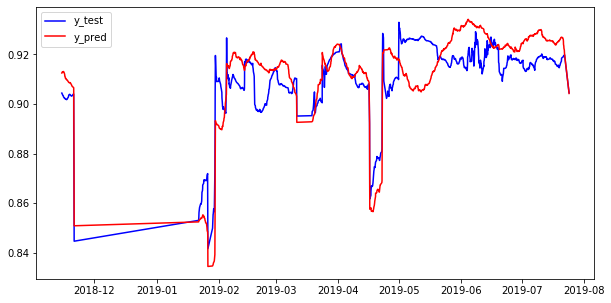

,features,中文,coef
0,MLPAP_TJC-0627.PV,OX預熱器出口溫度,0.545410
1,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,0.280964
11,MLPAP_TIC-0757.PV,反應器A/B側鹽浴溫度差,0.152646
7,MLPAP_TRC-0762.PV,鹽浴冷卻器(E112)入口溫度,0.053755
4,MLPAP_PIC-0741.PV,汽鼓(V211)鍋爐水壓力,0.047877


In [25]:
model = Ridge()
model.fit(train[features],train[y_name])
y_pred = model.predict(test[features])
y_pred = pd.Series(y_pred,index=test.index,name='y_pred')
print(metric(test[y_name],y_pred,'Ridge'))
plot_pred(test[y_name],y_pred);plt.show()
plot_coef(model).head(5)

# Lasso

             R2      RMSE      MAPE
Lasso  0.605786  0.052283  0.019672


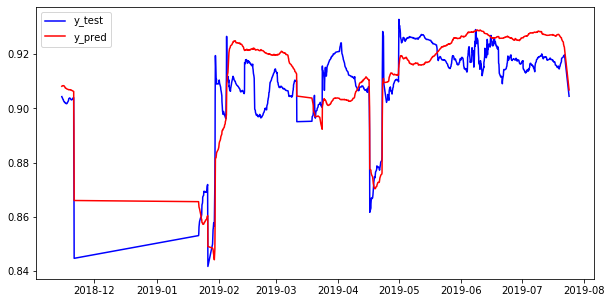

,features,中文,coef
0,MLPAP_TJC-0627.PV,OX預熱器出口溫度,0.275983
1,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,0.111112
2,MLPAP_FR-0632.PV,汽機風量,0.096961
4,MLPAP_PIC-0741.PV,汽鼓(V211)鍋爐水壓力,0.009481
8,MLPAP_LRC-0729.PV,鍋爐水液位控制,0.001528


In [26]:
model = Lasso(0.001)
model.fit(train[features],train[y_name])
y_pred = model.predict(test[features])
y_pred = pd.Series(y_pred,index=test.index,name='y_pred')
print(metric(test[y_name],y_pred,'Lasso'))
plot_pred(test[y_name],y_pred);plt.show()
plot_coef(model).head(5)

# xgboost

           R2      RMSE      MAPE
XGB  0.396724  0.064678  0.014288


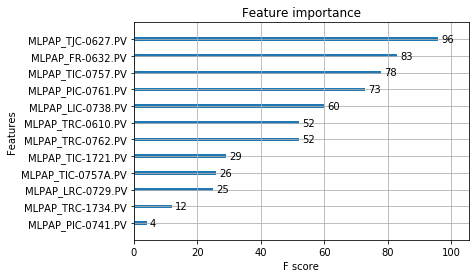

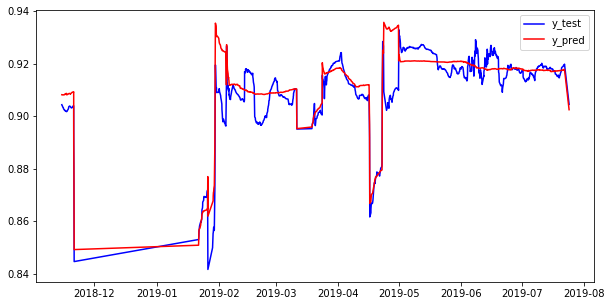

,features,中文,imp
0,MLPAP_TJC-0627.PV,OX預熱器出口溫度,0.727637
7,MLPAP_TRC-0762.PV,鹽浴冷卻器(E112)入口溫度,0.070813
2,MLPAP_FR-0632.PV,汽機風量,0.043918
6,MLPAP_PIC-0761.PV,鹽浴冷卻器(E112)出口壓力,0.037144
11,MLPAP_TIC-0757.PV,反應器A/B側鹽浴溫度差,0.033153


In [27]:
model = XGBRegressor(objective='reg:squarederror')
model.fit(train[features],train[y_name])
y_pred = model.predict(test[features])
y_pred = pd.Series(y_pred,index=test.index,name='y_pred')
print(metric(test[y_name],y_pred,'XGB'))
xgboost.plot_importance(model);plt.show()
plot_pred(test[y_name],y_pred);plt.show()
plot_imp(model).head(5)

# LGBM

            R2     RMSE      MAPE
LGBM  0.544185  0.05622  0.014331


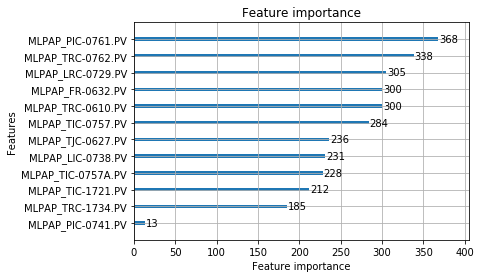

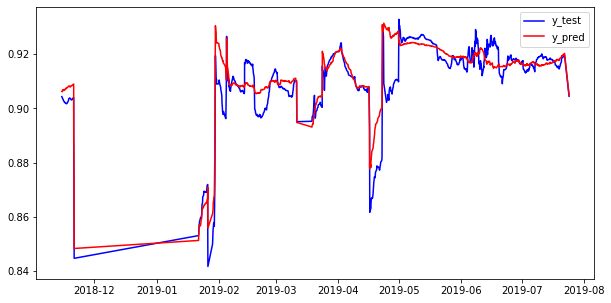

,features,中文,imp
6,MLPAP_PIC-0761.PV,鹽浴冷卻器(E112)出口壓力,368
7,MLPAP_TRC-0762.PV,鹽浴冷卻器(E112)入口溫度,338
8,MLPAP_LRC-0729.PV,鍋爐水液位控制,305
1,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,300
2,MLPAP_FR-0632.PV,汽機風量,300


In [28]:
model = LGBMRegressor()
model.fit(train[features],train[y_name])
y_pred = model.predict(test[features])
y_pred = pd.Series(y_pred,index=test.index,name='y_pred')
print(metric(test[y_name],y_pred,'LGBM'))
graph = lightgbm.create_tree_digraph(model)
graph.render(view=True)
lightgbm.plot_importance(model);plt.show()
plot_pred(test[y_name],y_pred);plt.show()
plot_imp(model).head(5)

# SVR

           R2      RMSE      MAPE
SVR  0.721204  0.043968  0.024411


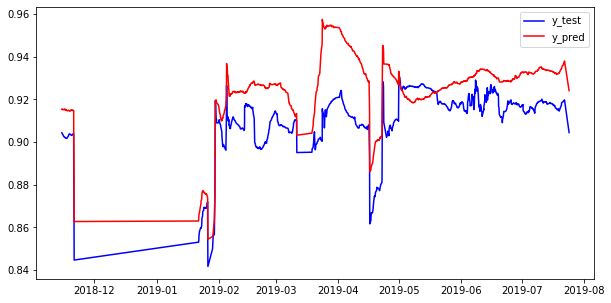

In [29]:
model = SVR()
model.fit(train[features],train[y_name])
y_pred = model.predict(test[features])
y_pred = pd.Series(y_pred,index=test.index,name='y_pred')
print(metric(test[y_name],y_pred,'SVR'))
plot_pred(test[y_name],y_pred)
plt.show()